In [18]:
#Download the data shared available on the google drive
!gdown --id 1y5sYVr_Tq_B-nk5lxYUOkH1ntwOyd9Y7

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1y5sYVr_Tq_B-nk5lxYUOkH1ntwOyd9Y7
To: /content/Corel5k.zip
100% 68.0M/68.0M [00:00<00:00, 201MB/s]


In [19]:
!unzip /content/Corel5k.zip

Streaming output truncated to the last 5000 lines.
  inflating: Corel5k/test/animalia/41022.jpeg  
  inflating: Corel5k/test/animalia/41023.jpeg  
  inflating: Corel5k/test/animalia/41024.jpeg  
   creating: Corel5k/test/animals/
  inflating: Corel5k/test/animals/173000.jpeg  
  inflating: Corel5k/test/animals/173001.jpeg  
  inflating: Corel5k/test/animals/173002.jpeg  
  inflating: Corel5k/test/animals/173003.jpeg  
  inflating: Corel5k/test/animals/173004.jpeg  
  inflating: Corel5k/test/animals/173005.jpeg  
  inflating: Corel5k/test/animals/173006.jpeg  
  inflating: Corel5k/test/animals/173007.jpeg  
  inflating: Corel5k/test/animals/173008.jpeg  
  inflating: Corel5k/test/animals/173009.jpeg  
  inflating: Corel5k/test/animals/173010.jpeg  
  inflating: Corel5k/test/animals/173011.jpeg  
  inflating: Corel5k/test/animals/173012.jpeg  
  inflating: Corel5k/test/animals/173013.jpeg  
  inflating: Corel5k/test/animals/173014.jpeg  
  inflating: Corel5k/test/animals/173015.jpeg  
  

In [2]:
from skimage.feature import hog
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import os
import math
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score







In [4]:

train = pd.read_csv('t_corel5k.csv')
test = pd.read_csv('t_corel5k.csv')

In [5]:
train.head()

,Id,LABELS,Flowers,Aircraft,Ancient Architecture,Plantations,Birds,Common things,Bridge,Buildings,...,Squirrel,Statue,Sun,Swimmers,Tiger,Tourist site,Valley,Plant,Plane,Tower
0,t1,"['Flowers', 'Plantation']",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,t2,"['Flowers', 'Plantation']",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,t3,"['Flowers','Plantation']",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t4,"['Flowers', 'Plantation']",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,t5,"['Flowers', 'Plantation']",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


image: (128, 192, 3)


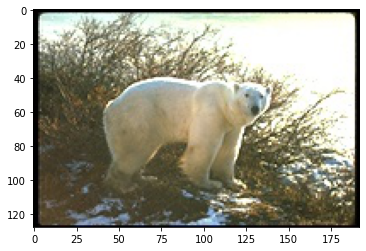

In [21]:
img=np.array(mpimg.imread('Corel5k/train/animals/173008.jpeg'))
img.setflags(write=1)
print('image:',img.shape)
plt.imshow(img)
plt.show()

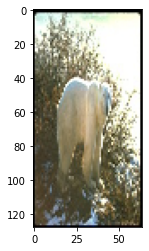

(128, 64, 3)


In [22]:
resized_img=cv2.resize(img,(64,128))
plt.imshow(resized_img)
plt.show()
print(resized_img.shape)

In [23]:
data_pic=[]
for entry in glob.glob("Corel5k/train/africans/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic.append(fd)

data_pic2=[]
for entry in glob.glob("Corel5k/train/aircraft/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic2.append(fd)

data_pic3=[]
for entry in glob.glob("Corel5k/train/ancient arichtecture/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic3.append(fd)

data_pic4=[]
for entry in glob.glob("Corel5k/train/animalia/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic4.append(fd)

data_pic5=[]
for entry in glob.glob("Corel5k/train/animals/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic5.append(fd)

data_pic6=[]
for entry in glob.glob("Corel5k/train/bear/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic6.append(fd)

data_pic7=[]
for entry in glob.glob("Corel5k/train/birds/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic7.append(fd)

data_pic8=[]
for entry in glob.glob("Corel5k/train/bridges/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic8.append(fd)

data_pic9=[]
for entry in glob.glob("Corel5k/train/buildings/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic9.append(fd)

data_pic10=[]
for entry in glob.glob("Corel5k/train/cars/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic10.append(fd)

data_pic11=[]
for entry in glob.glob("Corel5k/train/church/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic11.append(fd)

data_pic12=[]
for entry in glob.glob("Corel5k/train/city/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic12.append(fd)

data_pic13=[]
for entry in glob.glob("Corel5k/train/common/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic13.append(fd)

data_pic14=[]
for entry in glob.glob("Corel5k/train/common things/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic14.append(fd)

data_pic15=[]
for entry in glob.glob("Corel5k/train/coral/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic15.append(fd)

data_pic16=[]
for entry in glob.glob("Corel5k/train/deer/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic16.append(fd)

data_pic17=[]
for entry in glob.glob("Corel5k/train/domes/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic17.append(fd)

data_pic18=[]
for entry in glob.glob("Corel5k/train/egypt/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic18.append(fd)

data_pic19=[]
for entry in glob.glob("Corel5k/train/flowers/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic19.append(fd)

data_pic20=[]
for entry in glob.glob("Corel5k/train/fox/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic20.append(fd)

data_pic21=[]
for entry in glob.glob("Corel5k/train/giraffe,aligator/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic21.append(fd)

data_pic22=[]
for entry in glob.glob("Corel5k/train/horses/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic22.append(fd)

data_pic23=[]
for entry in glob.glob("Corel5k/train/landscape/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic23.append(fd)

data_pic24=[]
for entry in glob.glob("Corel5k/train/monastery/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic24.append(fd)

data_pic25=[]
for entry in glob.glob("Corel5k/train/monuments/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic25.append(fd)

data_pic26=[]
for entry in glob.glob("Corel5k/train/mountains/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic26.append(fd)

data_pic27=[]
for entry in glob.glob("Corel5k/train/museum/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic27.append(fd)

data_pic28=[]
for entry in glob.glob("Corel5k/train/ocean creatures/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic28.append(fd)

data_pic29=[]
for entry in glob.glob("Corel5k/train/people/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic29.append(fd)

data_pic30=[]
for entry in glob.glob("Corel5k/train/plane/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic30.append(fd)

data_pic31=[]
for entry in glob.glob("Corel5k/train/plant/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic31.append(fd)

data_pic32=[]
for entry in glob.glob("Corel5k/train/plantations/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic32.append(fd)

data_pic33=[]
for entry in glob.glob("Corel5k/train/polar bear/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic33.append(fd)

data_pic34=[]
for entry in glob.glob("Corel5k/train/scenery/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic34.append(fd)

data_pic35=[]
for entry in glob.glob("Corel5k/train/scenic view/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic35.append(fd)

data_pic36=[]
for entry in glob.glob("Corel5k/train/sea/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic36.append(fd)

data_pic37=[]
for entry in glob.glob("Corel5k/train/seabeach/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic37.append(fd)

data_pic38=[]
for entry in glob.glob("Corel5k/train/seascape/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic38.append(fd)

data_pic39=[]
for entry in glob.glob("Corel5k/train/small birds/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic39.append(fd)

data_pic40=[]
for entry in glob.glob("Corel5k/train/squirrel/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic40.append(fd)

data_pic41=[]
for entry in glob.glob("Corel5k/train/statue/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic41.append(fd)

data_pic42=[]
for entry in glob.glob("Corel5k/train/sun/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic42.append(fd)

data_pic43=[]
for entry in glob.glob("Corel5k/train/swimmers/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic43.append(fd)

data_pic44=[]
for entry in glob.glob("Corel5k/train/tiger/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic44.append(fd)

data_pic45=[]
for entry in glob.glob("Corel5k/train/tourist site/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic45.append(fd)

data_pic46=[]
for entry in glob.glob("Corel5k/train/tower/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic46.append(fd)

data_pic47=[]
for entry in glob.glob("Corel5k/train/trains/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic47.append(fd)

data_pic48=[]
for entry in glob.glob("Corel5k/train/valley/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic48.append(fd)

data_pic49=[]
for entry in glob.glob("Corel5k/train/waterrides/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic49.append(fd)

data_pic50=[]
for entry in glob.glob("Corel5k/train/wave/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  data_pic50.append(fd)

#COMBINE TRAIN DATA

train_data=data_pic+data_pic2+data_pic3+data_pic4+data_pic5+data_pic6+data_pic7+data_pic8+data_pic9+data_pic10+data_pic11+data_pic12+data_pic13+data_pic14+data_pic15+data_pic16+data_pic17+data_pic18+data_pic19+data_pic20+data_pic21+data_pic22+data_pic23+data_pic24+data_pic25+data_pic26+data_pic27+data_pic28+data_pic29+data_pic30+data_pic31+data_pic32+data_pic33+data_pic34+data_pic35+data_pic36+data_pic37+data_pic38+data_pic39+data_pic40+data_pic41+data_pic42+data_pic43+data_pic44+data_pic45+data_pic46+data_pic47+data_pic48+data_pic49+data_pic50
print(len(train_data))

3750


In [24]:
train_label_list=[]
for i in range (len(train_data)):
  if i<=75:
    train_label_list.append('africans')
  elif (i>=76 and i<=150) :
    train_label_list.append('aircraft')
  elif (i>=151 and i<=225):
    train_label_list.append('ancient architecture')
  elif (i>=226 and i<=300):
    train_label_list.append('animalia')
  elif (i>=301 and i<=375):
    train_label_list.append('animals')
  elif (i>=376 and i<=450):
    train_label_list.append('bear')
  elif (i>=451 and i<=525):
    train_label_list.append('birds')
  elif (i>=526 and i<=600):
    train_label_list.append('bridges')
  elif (i>=601 and i<=675):
    train_label_list.append('buildings')
  elif (i>=676 and i<=750):
    train_label_list.append('cars')
  elif (i>=751 and i<=825):
    train_label_list.append('church')
  elif (i>=826 and i<=900):
    train_label_list.append('city')
  elif (i>=901 and i<=975):
    train_label_list.append('common')
  elif (i>=976 and i<=1050):
    train_label_list.append('common things')
  elif (i>=1051 and i<=1125):
    train_label_list.append('coral')
  elif (i>=1126 and i<=1200):
    train_label_list.append('deer')
  elif (i>=1201 and i<=1275):
    train_label_list.append('domes')
  elif (i>=1276 and i<=1350):
    train_label_list.append('egypt')
  elif (i>=1351 and i<=1425):
    train_label_list.append('flowers')
  elif (i>=1426 and i<=1500):
    train_label_list.append('fox')
  elif (i>=1501 and i<=1575):
    train_label_list.append('giraffe,aligator')
  elif (i>=1576 and i<=1650):
    train_label_list.append('horses')
  elif (i>=1651 and i<=1725):
    train_label_list.append('landscape')
  elif (i>=1726 and i<=1800):
    train_label_list.append('monastery')
  elif (i>=1801 and i<=1875):
    train_label_list.append('monuments')
  elif (i>=1876 and i<=1950):
    train_label_list.append('mountains')
  elif (i>=1951 and i<=2025):
    train_label_list.append('museum')
  elif (i>=2026 and i<=2100):
    train_label_list.append('ocean creatures')
  elif (i>=2101 and i<=2175):
    train_label_list.append('people')
  elif (i>=2176 and i<=2250):
    train_label_list.append('plane')
  elif (i>=2251 and i<=2325):
    train_label_list.append('plant')
  elif (i>=2326 and i<=2400):
    train_label_list.append('plantations')
  elif (i>=2401 and i<=2475):
    train_label_list.append('polar bear')
  elif (i>=2476 and i<=2550):
    train_label_list.append('scenery')
  elif (i>=2551 and i<=2625):
    train_label_list.append('scenic view')
  elif (i>=2626 and i<=2700):
    train_label_list.append('sea')
  elif (i>=2771 and i<=2775):
    train_label_list.append('sea beach')
  elif (i>=2776 and i<=2850):
    train_label_list.append('seascape')
  elif (i>=2851 and i<=2925):
    train_label_list.append('small birds')
  elif (i>=2926 and i<=3000):
    train_label_list.append('squirrel')
  elif (i>=3001 and i<=3075):
    train_label_list.append('statue')
  elif (i>=3076 and i<=3150):
    train_label_list.append('sun')
  elif (i>=3151 and i<=3225):
    train_label_list.append('swimmers')
  elif (i>=3226 and i<=3300):
    train_label_list.append('tiger')
  elif (i>=3301 and i<=3375):
    train_label_list.append('tourist site')
  elif (i>=3376 and i<=3450):
    train_label_list.append('tower')
  elif (i>=3451 and i<=3525):
    train_label_list.append('trains')
  elif (i>=3526 and i<=3600):
    train_label_list.append('valley')
  elif (i>=3601 and i<=3675):
    train_label_list.append('waterrides')
  else:
    train_label_list.append('wave')

print(train_label_list)
print(len(train_label_list)) 

['africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'ai

In [7]:
print(train.columns)

Index(['Id', 'LABELS', 'Flowers', 'Aircraft', 'Ancient Architecture',
       'Plantations', 'Birds', 'Common things', 'Bridge', 'Buildings', 'Cars',
       'City', 'Coral', 'Egypt', 'Africans', 'Landscape', 'Mountains',
       'Clouds', 'Sky', 'People', 'Animals', 'Water', 'Waves', 'Trains',
       'Waterrides', 'Seascape', 'Animalia', 'Bear', 'Common', 'Church',
       'Deer', 'Domes', 'Fox', 'Giraffe', 'Horses', 'Monastery',
       'Ocean Creatures', 'Scenery', 'Scenic View', 'Sea', 'Seabeach',
       'Small birds', 'Squirrel ', 'Statue', 'Sun', 'Swimmers', 'Tiger',
       'Tourist site', 'Valley ', 'Plant', 'Plane', 'Tower'],
      dtype='object')


Flowers (0.998)
Plantations (0.998)


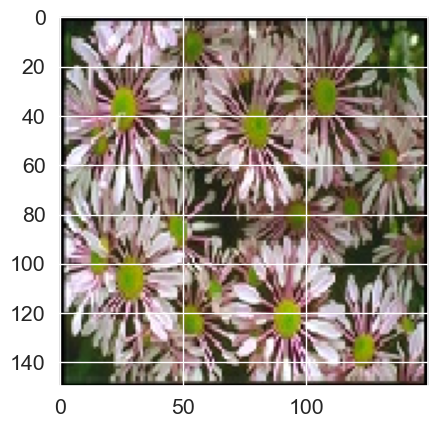

Sea (0.998)
Scenic View (0.998)
Sun (0.723)


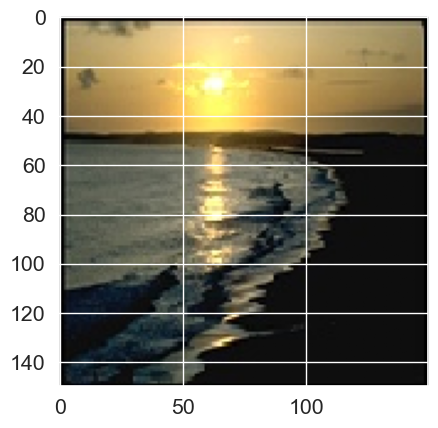

Scenic View (0.723)
Sun (0.723)
Sea (0.498)


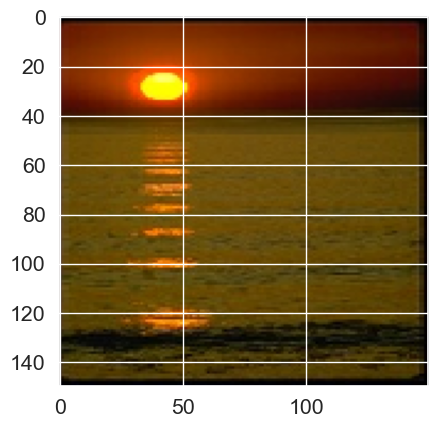

Sea (0.498)
Scenery (0.498)
Bridge (0.783)


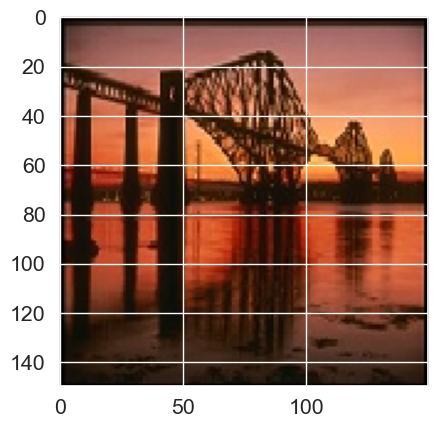

In [ ]:
classes = np.array(train.columns[7:])
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
classes = np.array(train.columns[13:])
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)
plt.show()

img3 = image.load_img('corel5k/t2688.jpg',target_size=(150,150,3))
img3 = image.img_to_array(img3)
img3 = img3/255
train[train['Id']=='t2688']
classes = np.array(train.columns[32:])
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
classes = np.array(train.columns[31:])
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
classes = np.array(train.columns[43:])
proba = model.predict(img3.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img3)
plt.show()
img4 = image.load_img('corel5k/t4675.jpg',target_size=(150,150,3))
img4 = image.img_to_array(img4)
img4 = img4/255
train[train['Id']=='t4675']
classes = np.array(train.columns[37:])
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
classes = np.array(train.columns[43:])
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
classes = np.array(train.columns[8:])
proba = model.predict(img4.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img4)
plt.show()
img5 = image.load_img('corel5k/t4229.jpg',target_size=(150,150,3))
img5 = image.img_to_array(img5)
img5 = img5/255
train[train['Id']=='t4229']
classes = np.array(train.columns[8:])
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
classes = np.array(train.columns[6:])
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
classes = np.array(train.columns[1:])
proba = model.predict(img5.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img5)
plt.show()


In [25]:
data_pic=[]
for entry in glob.glob("Corel5k/test/africans/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'africans'}
  data_pic.append(test_dict)

data_pic2=[]
for entry in glob.glob("Corel5k/test/aircraft/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'aircraft'}
  data_pic2.append(test_dict)
 

data_pic3=[]
for entry in glob.glob("Corel5k/test/ancient arichtecture/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'ancient arichtecture'}
  data_pic3.append(test_dict)

data_pic4=[]
for entry in glob.glob("Corel5k/test/animalia/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'animalia'}
  data_pic4.append(test_dict)

data_pic5=[]
for entry in glob.glob("Corel5k/test/animals/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'animals'}
  data_pic5.append(test_dict)

data_pic6=[]
for entry in glob.glob("Corel5k/test/bear/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'bear'}
  data_pic6.append(test_dict)

data_pic7=[]
for entry in glob.glob("Corel5k/test/birds/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'birds'}
  data_pic7.append(test_dict)

data_pic8=[]
for entry in glob.glob("Corel5k/test/bridges/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'bridges'}
  data_pic8.append(test_dict)

data_pic9=[]
for entry in glob.glob("Corel5k/test/buildings/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'buildings'}
  data_pic9.append(test_dict)

data_pic10=[]
for entry in glob.glob("Corel5k/test/cars/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'cars'}
  data_pic10.append(test_dict)

data_pic11=[]
for entry in glob.glob("Corel5k/test/church/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'church'}
  data_pic11.append(test_dict)

data_pic12=[]
for entry in glob.glob("Corel5k/test/city/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'city'}
  data_pic12.append(test_dict)

data_pic13=[]
for entry in glob.glob("Corel5k/test/common/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'common'}
  data_pic13.append(test_dict)

data_pic14=[]
for entry in glob.glob("Corel5k/test/common things/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'common things'}
  data_pic14.append(test_dict)

data_pic15=[]
for entry in glob.glob("Corel5k/test/coral/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'coral'}
  data_pic15.append(test_dict)

data_pic16=[]
for entry in glob.glob("Corel5k/test/deer/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'deer'}
  data_pic16.append(test_dict)

data_pic17=[]
for entry in glob.glob("Corel5k/test/domes/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'domes'}
  data_pic17.append(test_dict)

data_pic18=[]
for entry in glob.glob("Corel5k/test/egypt/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'egypt'}
  data_pic18.append(test_dict)

data_pic19=[]
for entry in glob.glob("Corel5k/test/flowers/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'flowers'}
  data_pic19.append(test_dict)

data_pic20=[]
for entry in glob.glob("Corel5k/test/fox/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'fox'}
  data_pic20.append(test_dict)

data_pic21=[]
for entry in glob.glob("Corel5k/test/giraffe,aligator/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'giraffe,aligator'}
  data_pic21.append(test_dict)

data_pic22=[]
for entry in glob.glob("Corel5k/test/horses/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'horses'}
  data_pic22.append(test_dict)

data_pic23=[]
for entry in glob.glob("Corel5k/test/landscape/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'landscape'}
  data_pic23.append(test_dict)

data_pic24=[]
for entry in glob.glob("Corel5k/test/monastery/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'monastery'}
  data_pic24.append(test_dict)

data_pic25=[]
for entry in glob.glob("Corel5k/test/monuments/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'monuments'}
  data_pic25.append(test_dict)

data_pic26=[]
for entry in glob.glob("Corel5k/test/mountains/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'mountains'}
  data_pic26.append(test_dict)

data_pic27=[]
for entry in glob.glob("Corel5k/test/museum/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'museum'}
  data_pic27.append(test_dict)

data_pic28=[]
for entry in glob.glob("Corel5k/test/ocean creatures/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'ocean creatures'}
  data_pic28.append(test_dict)

data_pic29=[]
for entry in glob.glob("Corel5k/test/people/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'people'}
  data_pic29.append(test_dict)

data_pic30=[]
for entry in glob.glob("Corel5k/test/plane/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'plane'}
  data_pic30.append(test_dict)

data_pic31=[]
for entry in glob.glob("Corel5k/test/plant/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'plant'}
  data_pic31.append(test_dict)

data_pic32=[]
for entry in glob.glob("Corel5k/test/plantations/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'plantations'}
  data_pic32.append(test_dict)

data_pic33=[]
for entry in glob.glob("Corel5k/test/polar bear/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'polar bear'}
  data_pic33.append(test_dict)

data_pic34=[]
for entry in glob.glob("Corel5k/test/scenery/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'scenery'}
  data_pic34.append(test_dict)

data_pic35=[]
for entry in glob.glob("Corel5k/test/scenic view/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'scenic view'}
  data_pic35.append(test_dict)

data_pic36=[]
for entry in glob.glob("Corel5k/test/sea/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'sea'}
  data_pic36.append(test_dict)

data_pic37=[]
for entry in glob.glob("Corel5k/test/seabeach/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'seabeach'}
  data_pic37.append(test_dict)

data_pic38=[]
for entry in glob.glob("Corel5k/test/seascape/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'seascape'}
  data_pic38.append(test_dict)

data_pic39=[]
for entry in glob.glob("Corel5k/test/small birds/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'small birds'}
  test_dict={'data':fd,'label':'small birds'}
  data_pic39.append(test_dict)

data_pic40=[]
for entry in glob.glob("Corel5k/test/squirrel/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'squirrel'}
  data_pic40.append(test_dict)

data_pic41=[]
for entry in glob.glob("Corel5k/test/statue/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'statue'}
  data_pic41.append(test_dict)

data_pic42=[]
for entry in glob.glob("Corel5k/test/sun/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'sun'}
  data_pic42.append(test_dict)

data_pic43=[]
for entry in glob.glob("Corel5k/test/swimmers/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'swimmers'}
  data_pic43.append(test_dict)

data_pic44=[]
for entry in glob.glob("Corel5k/test/tiger/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'tiger'}
  data_pic44.append(test_dict)

data_pic45=[]
for entry in glob.glob("Corel5k/test/tourist site/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'tourist site'}
  data_pic45.append(test_dict)

data_pic46=[]
for entry in glob.glob("Corel5k/test/tower/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'tower'}
  data_pic46.append(test_dict)

data_pic47=[]
for entry in glob.glob("Corel5k/test/trains/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'trains'}
  data_pic47.append(test_dict)

data_pic48=[]
for entry in glob.glob("Corel5k/test/valley/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'valley'}
  data_pic48.append(test_dict)

data_pic49=[]
for entry in glob.glob("Corel5k/test/waterrides/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'waterrides'}
  data_pic49.append(test_dict)

data_pic50=[]
for entry in glob.glob("Corel5k/test/wave/*.jpeg"):
  img=np.array(mpimg.imread(entry))
  resized_img=cv2.resize(img,(64,32))
  fd=hog(resized_img)
  test_dict={'data':fd,'label':'wave'}
  data_pic50.append(test_dict)

#COMBINE TEST DATA

test_data=data_pic+data_pic2+data_pic3+data_pic4+data_pic5+data_pic6+data_pic7+data_pic8+data_pic9+data_pic10+data_pic11+data_pic12+data_pic13+data_pic14+data_pic15+data_pic16+data_pic17+data_pic18+data_pic19+data_pic20+data_pic21+data_pic22+data_pic23+data_pic24+data_pic25+data_pic26+data_pic27+data_pic28+data_pic29+data_pic30+data_pic31+data_pic32+data_pic33+data_pic34+data_pic35+data_pic36+data_pic37+data_pic38+data_pic39+data_pic40+data_pic41+data_pic42+data_pic43+data_pic44+data_pic45+data_pic46+data_pic47+data_pic48+data_pic49+data_pic50
print(len(test_data))

1250


In [26]:
test_features=[]
test_labels=[]
for i in test_data:
  test_labels.append(i['label'])
  test_features.append(i['data'])
print(len(test_features))
print(test_labels)


1250
['africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'africans', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'aircraft', 'ancient arichtecture', 'ancient arichtecture', 'ancient arichtecture', 'ancient arichtecture', 'ancient arichtecture', 'ancient arichtecture', 'ancient arichtecture', 'ancient arichtecture', 'ancient arichtecture', 'ancient arichtecture', 'ancient arichtecture', 'ancient arichtecture', 'ancient arichtecture', 'ancient arichtecture', 'ancient arichtecture', 'ancient arichtecture', 'ancient a

In [10]:
#KNN MODEL
x_axis_k_points=[]
n=math.sqrt(5000)
n=int(n)
#LIST OF METRICS
f1_euclidean=[]
accuracies_euclidean=[]
conf_matrix_euclidean=[]
for k in range(n):
  #KNN CLASSIFIER TRAIN DATA
  knn_euclidean=KNeighborsClassifier(n_neighbors=k+1)
  knn_euclidean.fit(train_data,train_label_list)
  #kNN CLASSIFIER PREDICTION
  pred_labels_euclidean=knn_euclidean.predict(test_features)
  #ACCURACY OF PREDICTION
  acc_euclidean=knn_euclidean.score(test_features,test_labels)
  accuracies_euclidean.append(acc_euclidean)
  #CONFUSION MATRIX OF PREDICTION
  conf_matrix_euclidean.append(metrics.confusion_matrix(test_labels,pred_labels_euclidean))
  #F1 SCORE OF PREDICTION
  f1_euclidean.append(metrics.f1_score(test_labels,pred_labels_euclidean,average='macro'))
  
  x_axis_k_points.append(k+1)

In [12]:
m=math.sqrt(5000)
m=int(m)
#LIST OF METRICS
f1_manhattan=[]
accuracies_manhattan=[]
conf_matrix_manhattan=[]
for k in range(m):
  #KNN CLASSIFIER TRAIN DATA
  knn_manhattan=KNeighborsClassifier(n_neighbors=k+1,p=1)
  knn_manhattan.fit(train_data,train_label_list)
  #kNN CLASSIFIER PREDICTION
  pred_labels_manhattan=knn_manhattan.predict(test_features)
  #ACCURACY OF PREDICTION
  acc_manhattan=knn_manhattan.score(test_features,test_labels)
  accuracies_manhattan.append(acc_manhattan)
  #CONFUSION MATRIX OF PREDICTION
  conf_matrix_manhattan.append(metrics.confusion_matrix(test_labels,pred_labels_manhattan))
  #F1 SCORE OF PREDICTION
  f1_manhattan.append(metrics.f1_score(test_labels,pred_labels_manhattan,average='macro'))
  
  

In [6]:
print(test.columns)


Index(['Id', 'LABELS', 'Flowers', 'Aircraft', 'Ancient Architecture',
       'Plantations', 'Birds', 'Common things', 'Bridge', 'Buildings', 'Cars',
       'City', 'Coral', 'Egypt', 'Africans', 'Landscape', 'Mountains',
       'Clouds', 'Sky', 'People', 'Animals', 'Water', 'Waves', 'Trains',
       'Waterrides', 'Seascape', 'Animalia', 'Bear', 'Common', 'Church',
       'Deer', 'Domes', 'Fox', 'Giraffe', 'Horses', 'Monastery',
       'Ocean Creatures', 'Scenery', 'Scenic View', 'Sea', 'Seabeach',
       'Small birds', 'Squirrel ', 'Statue', 'Sun', 'Swimmers', 'Tiger',
       'Tourist site', 'Valley ', 'Plant', 'Plane', 'Tower'],
      dtype='object')


Flowers (0.998)
Plantations (0.998)


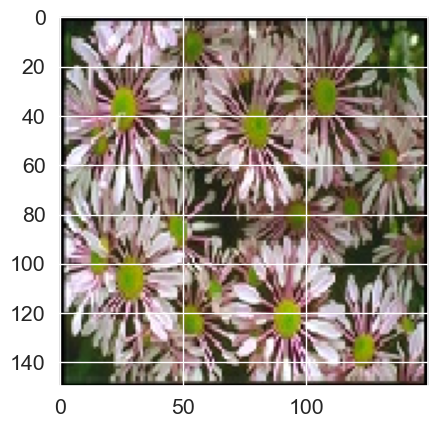

Sea (0.998)
Scenic View (0.998)
Sun (0.723)


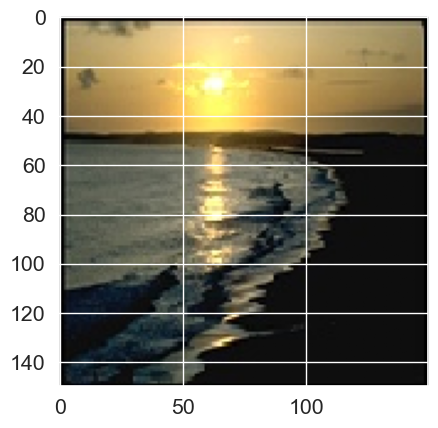

Scenic View (0.723)
Sun (0.723)
Sea (0.498)


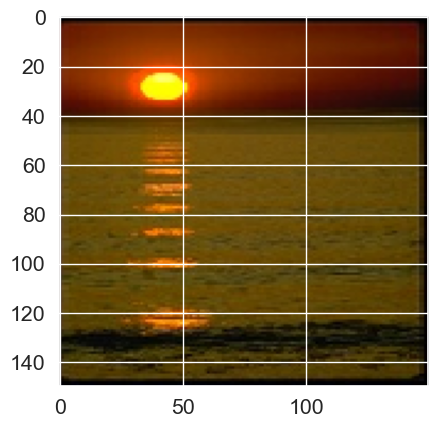

Sea (0.498)
Scenery (0.498)
Bridge (0.783)


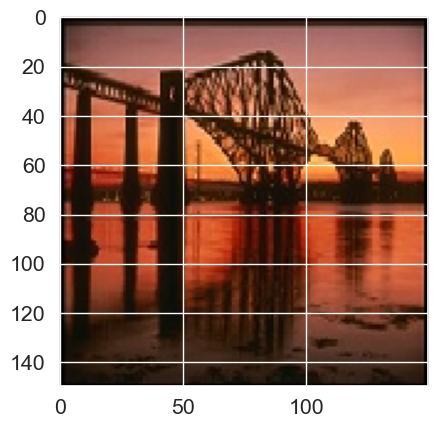

In [ ]:
classes = np.array(test.columns[7:])
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
classes = np.array(test.columns[13:])
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)
plt.show()

img3 = image.load_img('corel5k/t2688.jpg',target_size=(150,150,3))
img3 = image.img_to_array(img3)
img3 = img3/255
train[train['Id']=='t2688']
classes = np.array(test.columns[32:])
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
classes = np.array(test.columns[31:])
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
classes = np.array(test.columns[43:])
proba = model.predict(img3.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img3)
plt.show()
img4 = image.load_img('corel5k/t4675.jpg',target_size=(150,150,3))
img4 = image.img_to_array(img4)
img4 = img4/255
train[train['Id']=='t4675']
classes = np.array(test.columns[37:])
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
classes = np.array(test.columns[43:])
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
classes = np.array(test.columns[8:])
proba = model.predict(img4.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img4)
plt.show()
img5 = image.load_img('corel5k/t4229.jpg',target_size=(150,150,3))
img5 = image.img_to_array(img5)
img5 = img5/255
train[train['Id']=='t4229']
classes = np.array(test.columns[8:])
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
classes = np.array(test.columns[6:])
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
classes = np.array(test.columns[1:])
proba = model.predict(img5.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img5)
plt.show()


In [13]:
for i in range(len(f1_manhattan)):
  print('FOR K=',i+1,',F1 SCORE=',f1_manhattan[i],',ACCURACY=',accuracies_manhattan[i])



FOR K= 1 ,F1 SCORE= 0.9996001599360256 ,ACCURACY= 0.9996
FOR K= 2 ,F1 SCORE= 0.8237232289950577 ,ACCURACY= 0.786
FOR K= 3 ,F1 SCORE= 0.7872127872127871 ,ACCURACY= 0.787
FOR K= 4 ,F1 SCORE= 0.7646347781039545 ,ACCURACY= 0.7274
FOR K= 5 ,F1 SCORE= 0.731114211680287 ,ACCURACY= 0.7302
FOR K= 6 ,F1 SCORE= 0.7354085603112841 ,ACCURACY= 0.7008
FOR K= 7 ,F1 SCORE= 0.7024875621890546 ,ACCURACY= 0.701
FOR K= 8 ,F1 SCORE= 0.7113030957523399 ,ACCURACY= 0.6792
FOR K= 9 ,F1 SCORE= 0.6822875297855441 ,ACCURACY= 0.68
FOR K= 10 ,F1 SCORE= 0.6996376811594203 ,ACCURACY= 0.6684
FOR K= 11 ,F1 SCORE= 0.6723692062860553 ,ACCURACY= 0.6706
FOR K= 12 ,F1 SCORE= 0.6893523600439078 ,ACCURACY= 0.6604
FOR K= 13 ,F1 SCORE= 0.6719211822660098 ,ACCURACY= 0.667
FOR K= 14 ,F1 SCORE= 0.6812661023187339 ,ACCURACY= 0.6536
FOR K= 15 ,F1 SCORE= 0.663913470993117 ,ACCURACY= 0.6582
FOR K= 16 ,F1 SCORE= 0.6758798599594619 ,ACCURACY= 0.6482
FOR K= 17 ,F1 SCORE= 0.6596119929453262 ,ACCURACY= 0.6526
FOR K= 18 ,F1 SCORE= 0.66505845

In [14]:
for i in range(len(f1_euclidean)):
  print('FOR K=',i+1,',F1 SCORE=',f1_euclidean[i],',ACCURACY=',accuracies_euclidean[i])


FOR K= 1 ,F1 SCORE= 0.9996001599360256 ,ACCURACY= 0.9996
FOR K= 2 ,F1 SCORE= 0.8126117341134406 ,ACCURACY= 0.7694
FOR K= 3 ,F1 SCORE= 0.7962602259446826 ,ACCURACY= 0.7908
FOR K= 4 ,F1 SCORE= 0.7635874137640922 ,ACCURACY= 0.719
FOR K= 5 ,F1 SCORE= 0.7427683944865076 ,ACCURACY= 0.735
FOR K= 6 ,F1 SCORE= 0.7353646011639849 ,ACCURACY= 0.6908
FOR K= 7 ,F1 SCORE= 0.707298433320596 ,ACCURACY= 0.6936
FOR K= 8 ,F1 SCORE= 0.7137662337662338 ,ACCURACY= 0.6694
FOR K= 9 ,F1 SCORE= 0.685234643265929 ,ACCURACY= 0.67
FOR K= 10 ,F1 SCORE= 0.7021351067553377 ,ACCURACY= 0.6596
FOR K= 11 ,F1 SCORE= 0.6810131403542182 ,ACCURACY= 0.665
FOR K= 12 ,F1 SCORE= 0.68937522061419 ,ACCURACY= 0.648
FOR K= 13 ,F1 SCORE= 0.6741274658573596 ,ACCURACY= 0.6564
FOR K= 14 ,F1 SCORE= 0.680353982300885 ,ACCURACY= 0.6388
FOR K= 15 ,F1 SCORE= 0.6650246305418719 ,ACCURACY= 0.6464
FOR K= 16 ,F1 SCORE= 0.6759816059426954 ,ACCURACY= 0.6336
FOR K= 17 ,F1 SCORE= 0.6577257272383831 ,ACCURACY= 0.6376
FOR K= 18 ,F1 SCORE= 0.67591111111

In [15]:

print('ACCURACY(EUCLIDEAN):',accuracies_euclidean[69])
print('ACCURACY(MANHATTAN):',accuracies_manhattan[69])

ACCURACY(EUCLIDEAN): 0.5988
ACCURACY(MANHATTAN): 0.6058


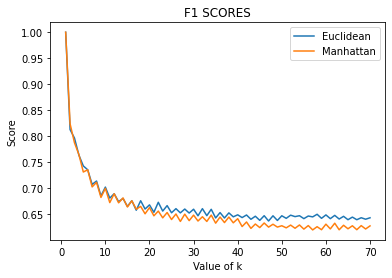

In [16]:
#F1 SCORES
plt.plot(x_axis_k_points,f1_euclidean,label='Euclidean')
plt.plot(x_axis_k_points,f1_manhattan,label='Manhattan')
plt.title("F1 SCORES")
plt.xlabel("Value of k")
plt.ylabel("Score")
plt.legend()
plt.show()

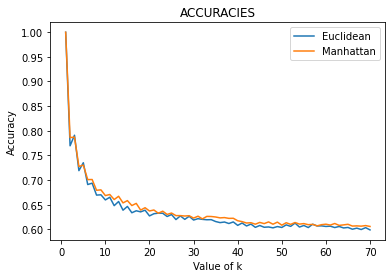

In [17]:
#ACCURACIES
plt.plot(x_axis_k_points,accuracies_euclidean,label='Euclidean')
plt.plot(x_axis_k_points,accuracies_manhattan,label='Manhattan')
plt.title("ACCURACIES")
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
